# SuperKart Project

## Context:

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of actions. Forecasting helps an organization to plan its sales operations by regions and provide valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective:

SuperKartKart is an organization which owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.


## Data Description:

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number
* Product_Weight - weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular and no sugar
* Product_Allocated_Area - ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, breads, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - year in which the store was established
* Store_Size - size of the store depending on sq. feet like high, medium and low
* Store_Location_City_Type - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




# Or Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

### Import Dataset

In [2]:
SuperKart = pd.read_csv("SuperKart.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = SuperKart.copy()

### View the first and last 5 rows of the dataset

In [4]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [5]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


#### Understand the shape of the dataset

In [6]:
data.shape

(8763, 12)

* The dataset has 8763 rows and 12 columns 

#### Check the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


* `Product_Weight`, ` Product_Allocated_Area`,`Product_MRP`, `Store_Establishment_Year` and `Product_Store_Sales_Total` are numeric features while rest are objects.
* There are no null values in the dataset.

In [8]:
# checking for duplicate values
data.duplicated().sum()

0

- There are no duplicate values in the data. 

In [9]:
# checking the number of unique values
data["Product_Id"].nunique()



8763

* All the values in the Product_Id column are unique.
* We can drop this column.


In [10]:

data.drop(["Product_Id"], axis=1, inplace=True)

## Data Overview

- Observations
- Sanity checks

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
- Different varieties of products are available at stores. A store needs to plan its inventory appropriately which is well aligned to the supply and demand characteristics. Which product type is contributing the most to the revenue of the company (SuperKart)?
- Location may have a high impact on the revenue of a store. Find out the type of stores and locations that are having a high impact on the revenue of the company.
- Nowadays many customers prefer products that have low sugar content in them. How many items have been sold in each of the 16 product types that have low sugar content in them?
- Which product type has been sold the most number of times in each of the stores? Which product type is contributing the most to the revenue of the individual stores?
- There are some stores of a company that generally sell only premium items having higher prices than others. Which store has sold more costly goods than others?
 

**Let's check the statistical summary of the data.**

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,8763.0,12.653792,2.217320,4.000,11.150,12.660,14.180,22.000
Product_Allocated_Area,8763.0,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_MRP,8763.0,147.032539,30.694110,31.000,126.160,146.740,167.585,266.000
Store_Establishment_Year,8763.0,2002.032751,8.388381,1987.000,1998.000,2009.000,2009.000,2009.000
Product_Store_Sales_Total,8763.0,3464.003640,1065.630494,33.000,2761.715,3452.340,4145.165,8000.000


**Observations:**
* The maximum of the totalrevenue (= the maximum Product_Store_Sales_Total) is 8000
* The mean of the total revenue is 3464
* The first store establishment year was in 1987 and the recent one was in 2009

### Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Product_Weight

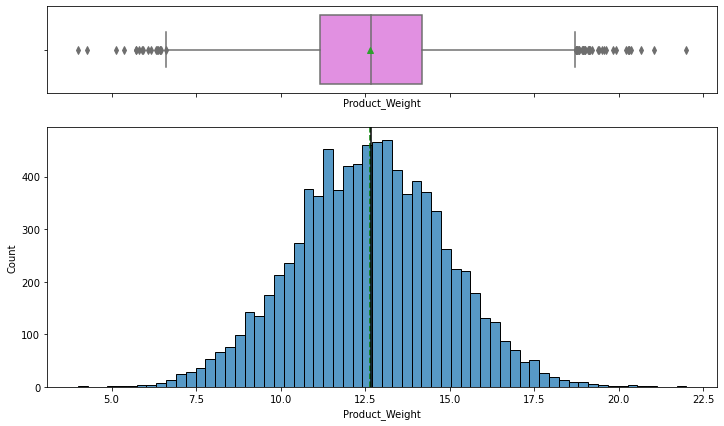

In [13]:
histogram_boxplot(data, "Product_Weight")

#### Observations on Product_Allocated_Area

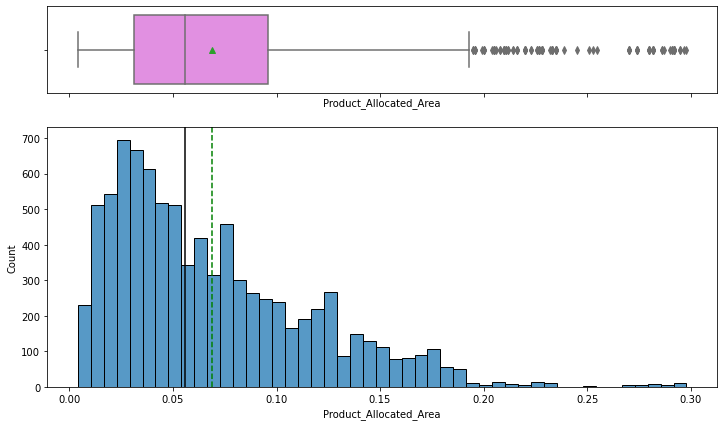

In [14]:
histogram_boxplot(data, "Product_Allocated_Area")

#### Observations on Product_MRP

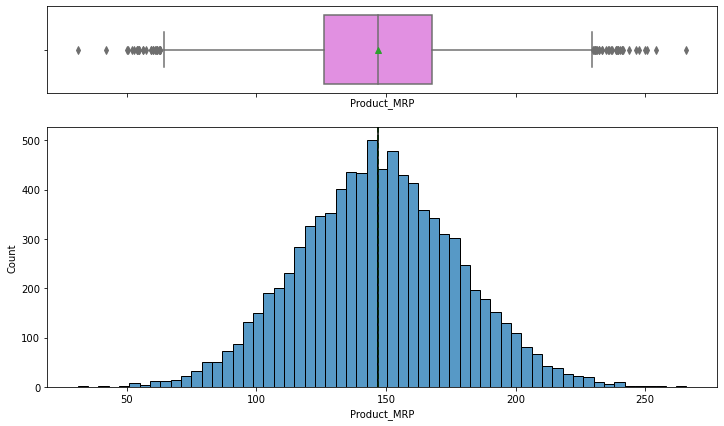

In [15]:
histogram_boxplot(data, "Product_MRP")

#### Observations on Store_Establishment_Year

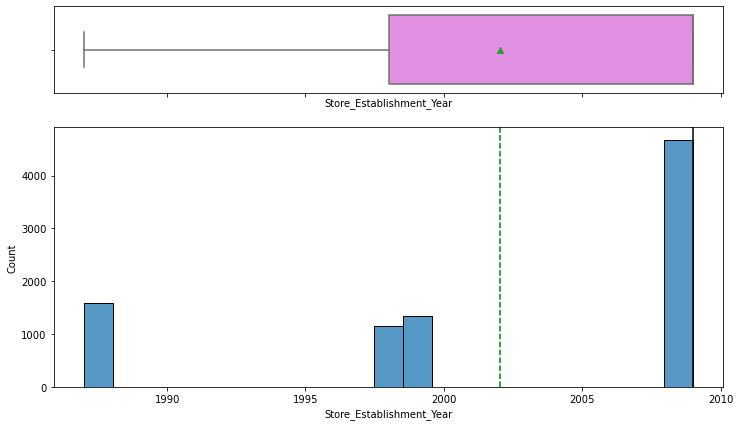

In [16]:
histogram_boxplot(data, "Store_Establishment_Year")

#### Observations on Product_Store_Sales_Total

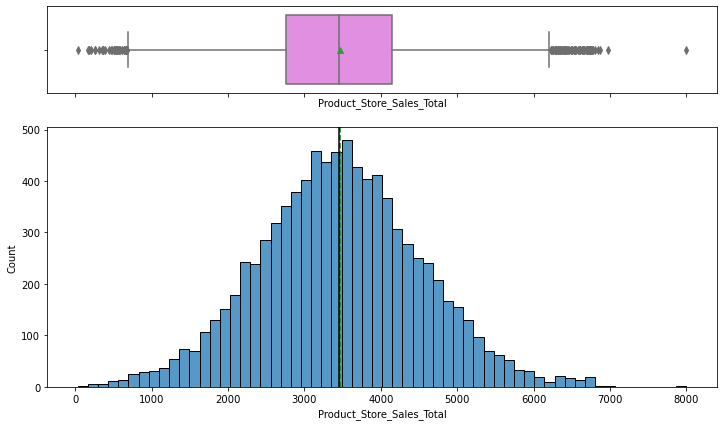

In [17]:
histogram_boxplot(data, "Product_Store_Sales_Total")

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Product_Sugar_Content

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Weight             8763 non-null   float64
 1   Product_Sugar_Content      8763 non-null   object 
 2   Product_Allocated_Area     8763 non-null   float64
 3   Product_Type               8763 non-null   object 
 4   Product_MRP                8763 non-null   float64
 5   Store_Id                   8763 non-null   object 
 6   Store_Establishment_Year   8763 non-null   int64  
 7   Store_Size                 8763 non-null   object 
 8   Store_Location_City_Type   8763 non-null   object 
 9   Store_Type                 8763 non-null   object 
 10  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 753.2+ KB


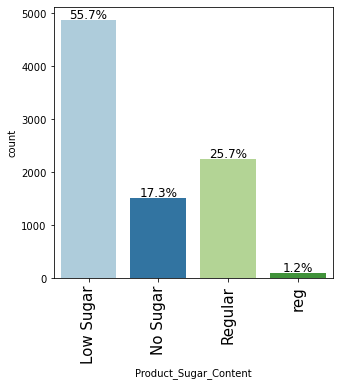

In [20]:
labeled_barplot(data, "Product_Sugar_Content", perc=True)

#### Observations on Product_Type

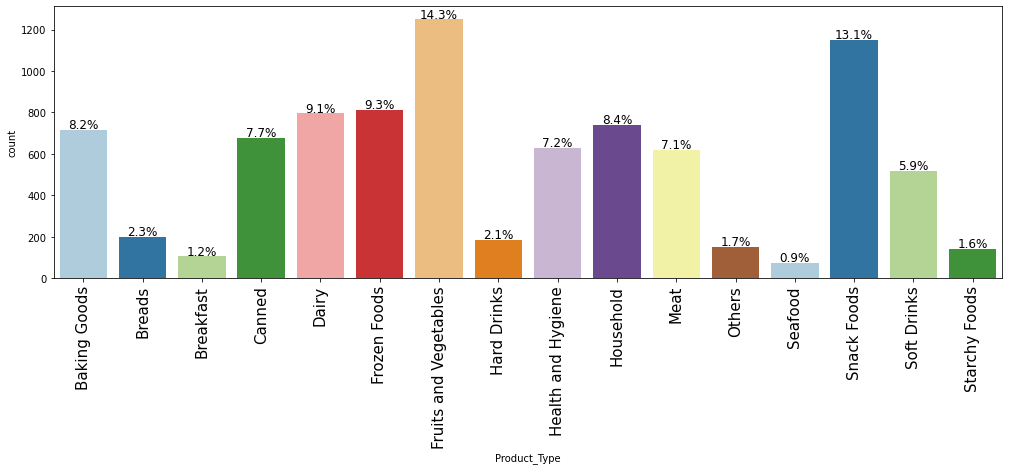

In [21]:
labeled_barplot(data, "Product_Type", perc=True)

#### Observations on Store_Id

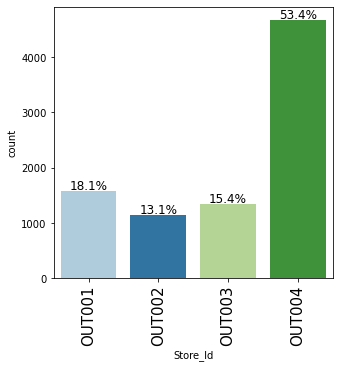

In [22]:
labeled_barplot(data, "Store_Id", perc=True)

#### Observations on Store_Size

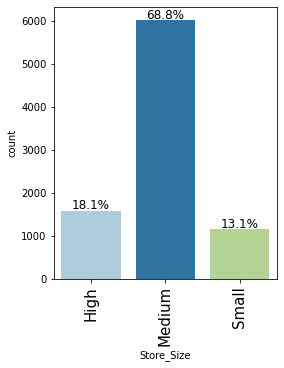

In [23]:
labeled_barplot(data, "Store_Size", perc=True)

#### Observations on Store_Location_City_Type

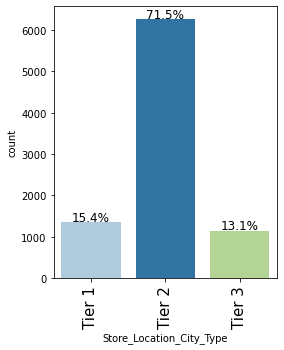

In [24]:
labeled_barplot(data, "Store_Location_City_Type", perc=True)

#### Observations on Store_Type

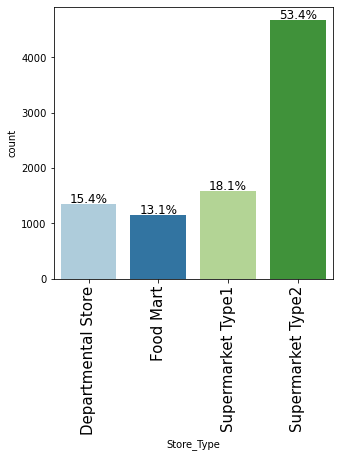

In [25]:
labeled_barplot(data, "Store_Type", perc=True)

### Bivariate Analysis

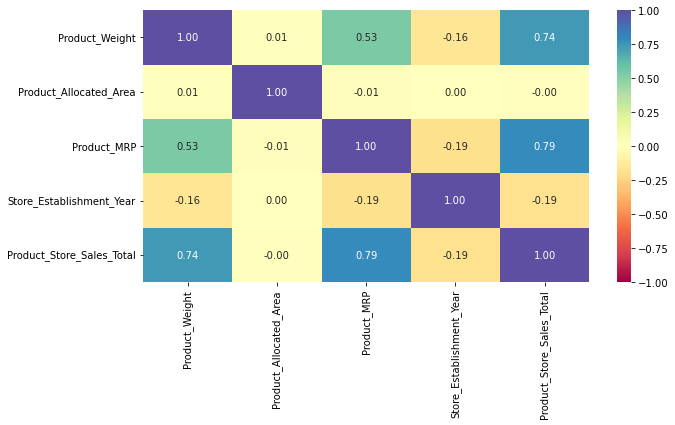

In [26]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [27]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [28]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Store_Type  Departmental Store  Food Mart  Supermarket Type1  \
Store_Size                                                     
Small                        0       1152                  0   
All                       1349       1152               1586   
High                         0          0               1586   
Medium                    1349          0                  0   

Store_Type  Supermarket Type2   All  
Store_Size                           
Small                       0  1152  
All                      4676  8763  
High                        0  1586  
Medium                   4676  6025  
------------------------------------------------------------------------------------------------------------------------


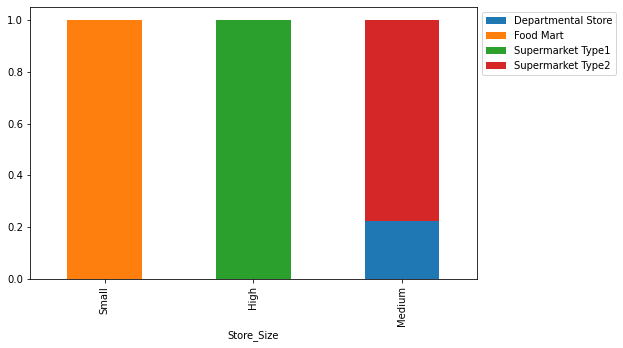

In [29]:
stacked_barplot(data, "Store_Size", "Store_Type")

Store_Type             Departmental Store  Food Mart  Supermarket Type1  \
Product_Sugar_Content                                                     
All                                  1349       1152               1586   
Low Sugar                             750        658                845   
Regular                               351        273                442   
No Sugar                              228        210                279   
reg                                    20         11                 20   

Store_Type             Supermarket Type2   All  
Product_Sugar_Content                           
All                                 4676  8763  
Low Sugar                           2632  4885  
Regular                             1185  2251  
No Sugar                             802  1519  
reg                                   57   108  
------------------------------------------------------------------------------------------------------------------------


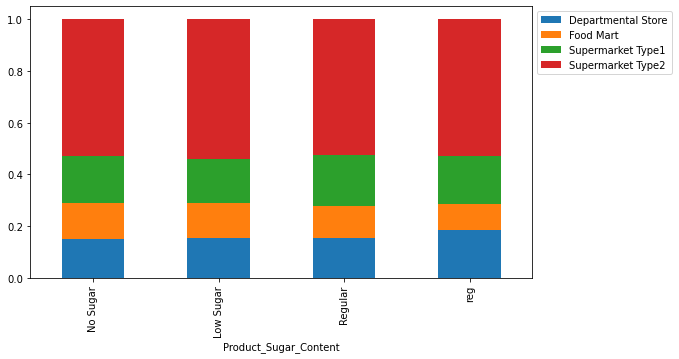

In [30]:
stacked_barplot(data, "Product_Sugar_Content", "Store_Type")

Product_Sugar_Content  Low Sugar  No Sugar  Regular  reg   All
Product_Type                                                  
All                         4885      1519     2251  108  8763
Frozen Foods                 531         0      264   16   811
Baking Goods                 462         0      240   14   716
Fruits and Vegetables        864         0      372   13  1249
Canned                       402         0      264   11   677
Snack Foods                  804         0      334   11  1149
Meat                         377         0      232    9   618
Soft Drinks                  370         0      141    8   519
Dairy                        590         0      199    7   796
Hard Drinks                  128         0       52    6   186
Starchy Foods                 97         0       40    4   141
Breakfast                     65         0       38    3   106
Breads                       148         0       49    3   200
Seafood                       47         0       26    

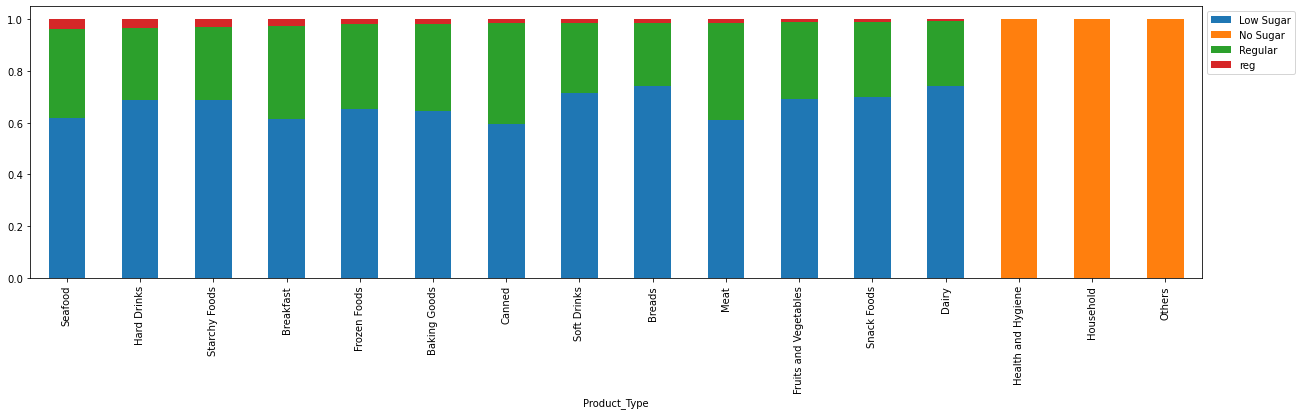

In [31]:
stacked_barplot(data, "Product_Type", "Product_Sugar_Content")

Product_Type        Baking Goods  Breads  Breakfast  Canned  Dairy  \
Store_Type                                                           
All                          716     200        106     677    796   
Supermarket Type2            385     113         62     380    397   
Departmental Store            99      34         19      90    145   
Supermarket Type1            136      30         10     119    150   
Food Mart                     96      23         15      88    104   

Product_Type        Frozen Foods  Fruits and Vegetables  Hard Drinks  \
Store_Type                                                             
All                          811                   1249          186   
Supermarket Type2            446                    700           95   
Departmental Store           122                    182           23   
Supermarket Type1            142                    199           38   
Food Mart                    101                    168           30   

Prod

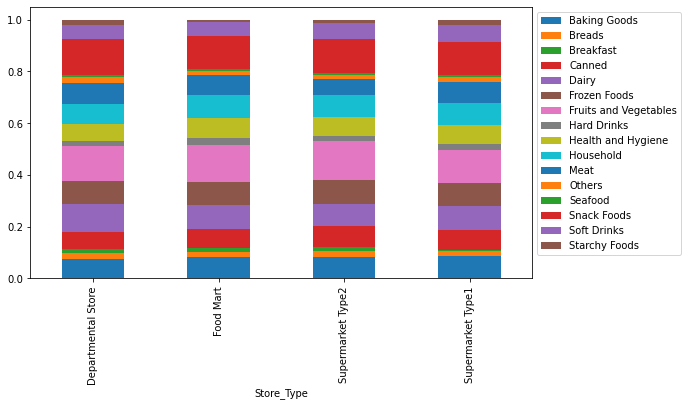

In [32]:
stacked_barplot(data, "Store_Type", "Product_Type")

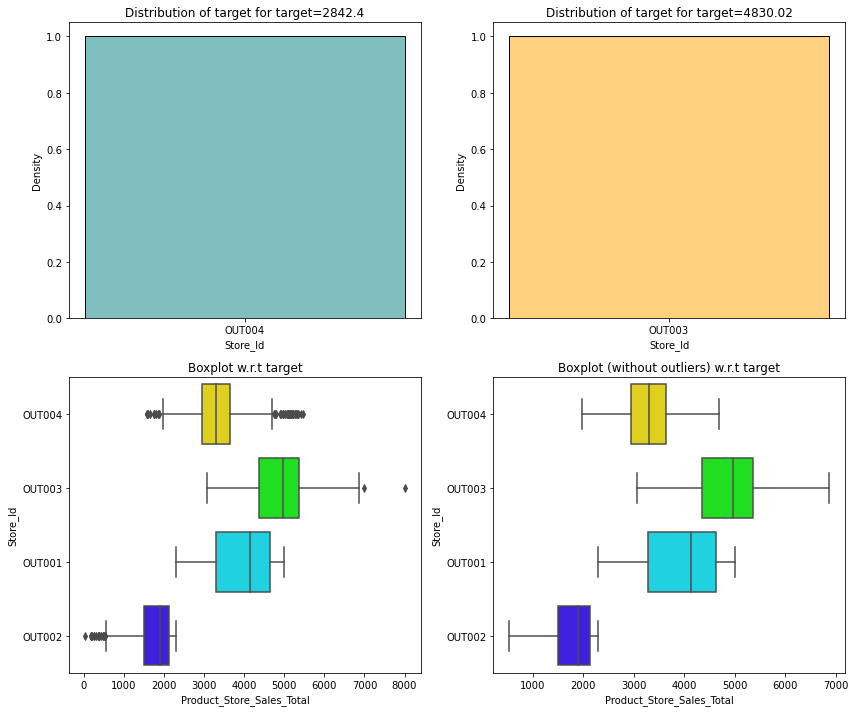

In [33]:
distribution_plot_wrt_target(data, "Store_Id", "Product_Store_Sales_Total")

## Data Preprocessing

- Missing value treatment (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Outlier Check

- Let's check for outliers in the data.

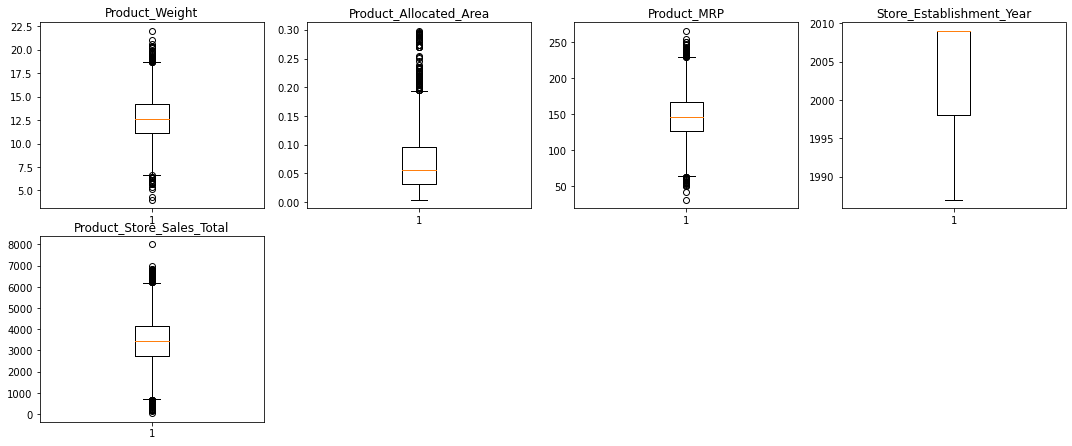

In [34]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Feature Engineering

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.**

In [35]:
age = []
for i in range(0, len(data)):
    kk=2022-data.Store_Establishment_Year[i]
    age.append(kk)

In [36]:
data["Store_Age"]=age

In [37]:
data['Store_Age'].describe()

count    8763.000000
mean       19.967249
std         8.388381
min        13.000000
25%        13.000000
50%        13.000000
75%        24.000000
max        35.000000
Name: Store_Age, dtype: float64

* the oldest store has the age of 35 years
* the youngest store has the age of 13 years old

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [38]:
data['Product_Type'].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
       'Health and Hygiene', 'Snack Foods', 'Meat', 'Household',
       'Hard Drinks', 'Fruits and Vegetables', 'Breads', 'Soft Drinks',
       'Breakfast', 'Others', 'Starchy Foods', 'Seafood'], dtype=object)

In [39]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [40]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [41]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

* so the product types will be just two broad categories : Perishables / Non Perishables 

#### Let's change product types into just 2 broad categories:

In [42]:
data['Product_Type']=change1

In [43]:
data['Product_Type'].describe()

count                8763
unique                  2
top       Non Perishables
freq                 5718
Name: Product_Type, dtype: object

## Building bagging and boosting models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

In [44]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [45]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [46]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [47]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

### Split the data into train and test sets
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.



In [64]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Store_Age
0,12.66,Low Sugar,0.027,Non Perishables,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,13
1,16.54,Low Sugar,0.144,Perishables,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,23
2,14.28,Regular,0.031,Non Perishables,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,35
3,12.10,Low Sugar,0.112,Non Perishables,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,35
4,9.57,No Sugar,0.010,Non Perishables,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,24


In [65]:
#Dropping columns - 
data.drop(columns=['Product_Sugar_Content','Product_Type','Store_Id','Store_Size','Store_Location_City_Type','Store_Type'], inplace=True)

In [66]:
data.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Store_Establishment_Year,Product_Store_Sales_Total,Store_Age
0,12.66,0.027,117.08,2009,2842.40,13
1,16.54,0.144,171.43,1999,4830.02,23
2,14.28,0.031,162.08,1987,4130.16,35
3,12.10,0.112,186.31,1987,4132.18,35
4,9.57,0.010,123.67,1998,2279.36,24


In [67]:

# Separating features and the target column
X = data.drop(["Product_Store_Sales_Total"], axis=1)
y = data['Product_Store_Sales_Total']


In [68]:

#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)



In [69]:
X_train.shape, X_test.shape


((6134, 5), (2629, 5))

- We have 6134 observations in the train set and 2629 observations in the test set.

### Decision Tree Model

In [70]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [71]:
DecisionTreeRegressor(random_state=1)

DecisionTreeRegressor(random_state=1)

In [72]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [73]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [74]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  391.769494  133.069498   0.865877        0.865622  5.593766


- The Decision tree model with default parameters is overfitting the train data.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

#### Hyperparameter Tuning

In [75]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None], 
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0.001,
                      min_samples_leaf=5, random_state=1)

In [76]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [77]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  317.072681  143.885466   0.912147        0.911979  6.312897


- The overfitting is reduced after hyperparameter tuning and the test score has increased by approx 2%.
- RMSE is also reduced on test data and the model is generalizing better than the decision tree model with default parameters.

**Plotting the feature importance of each variable**

In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Product_MRP               0.474950
Store_Age                 0.381633
Product_Weight            0.083023
Store_Establishment_Year  0.056908
Product_Allocated_Area    0.003486


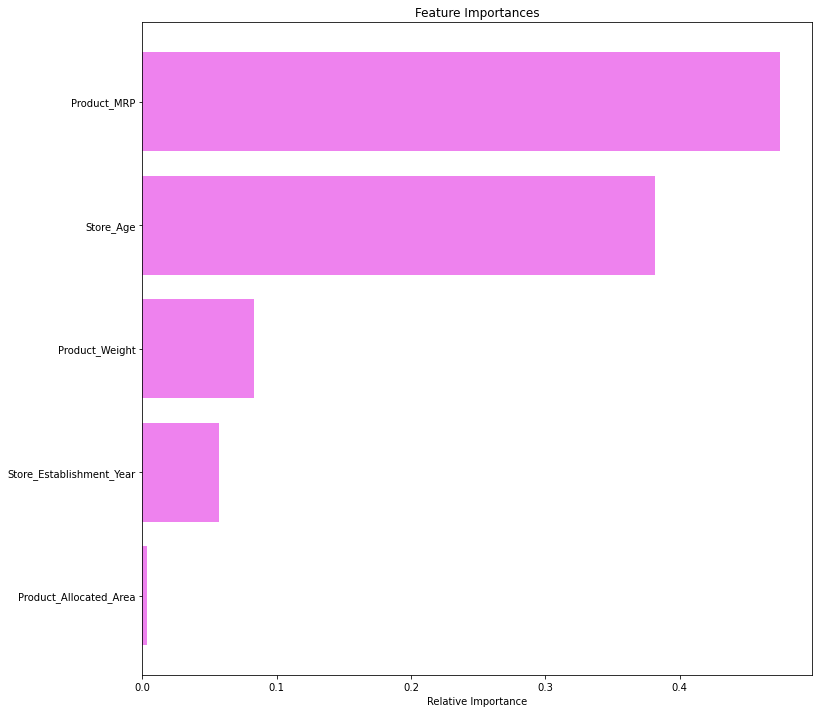

In [79]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Product_MRP is the most important feature, in addition to temp and yr, for tuned decision tree model

### Random Forest Model

In [80]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [81]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  105.797225  40.035684   0.990108          0.9901  1.412262


In [82]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  298.997383  112.214025   0.921878        0.921729  5.005246


- Random forest is giving a good r2 score of 92% on the test data but it is slightly overfitting the train data.
- Let's try to reduce this overfitting by hyperparameter tuning.

#### Hyperparameter Tuning

In [83]:
# Choose the type of classifier. 
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {  
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=1)

In [84]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  103.566704  42.503564    0.99052        0.990513  1.561745


In [85]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  296.328268  117.731507   0.923266         0.92312  5.287624


In [86]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Product_MRP               0.345082
Product_Weight            0.235506
Store_Establishment_Year  0.219577
Store_Age                 0.178373
Product_Allocated_Area    0.021462


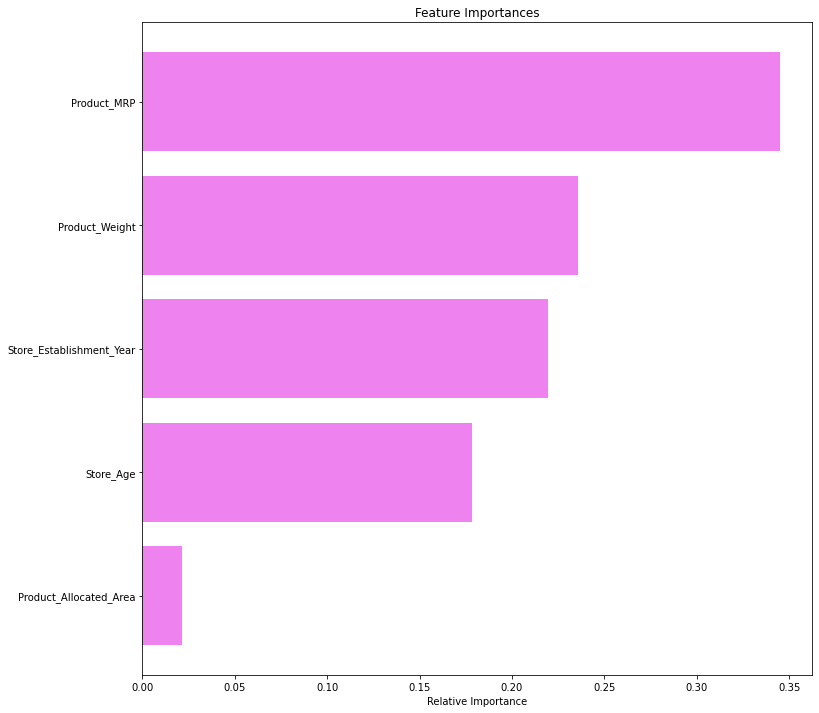

In [87]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Product_MRP is the most important feature, in addition to temp and yr, for the tuned random forest model.

### Boosting Models

#### AdaBoost Regressor

In [88]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [89]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
        RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  476.9992  372.805922   0.798913        0.798749  13.38478


In [90]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared       MAPE
0  498.272479  388.073581   0.783043        0.782629  15.412082


- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to the decision tree and random forest model.

#### Hyperparameter Tuning

In [91]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=10, random_state=1)

In [92]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  473.935351  370.46619   0.801488        0.801326  13.309606


In [93]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_train_perf)

Testing performance 
          RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  473.935351  370.46619   0.801488        0.801326  13.309606


In [94]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Store_Age                 0.519030
Product_MRP               0.249873
Store_Establishment_Year  0.186352
Product_Weight            0.042651
Product_Allocated_Area    0.002095


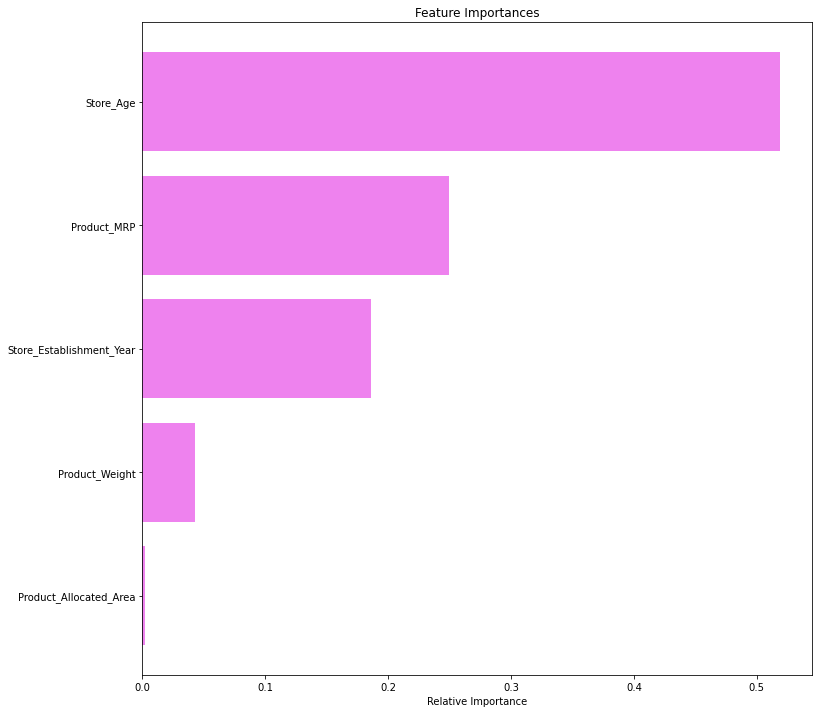

In [95]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Store_Age is the most important feature

### Gradient Boosting Regressor

In [97]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [98]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  312.296698  158.015164   0.913805        0.913735  5.965826


In [99]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  347.393033  174.373634   0.894541         0.89434  7.798668


- Gradient boosting is generalizing well and giving decent results but not as good as random forest.

#### Hyperparameter Tuning

In [100]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features=0.7, n_estimators=50,
                          random_state=1, subsample=1)

In [101]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
          RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  175.833686  71.83837   0.972676        0.972653  2.527047


In [102]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  296.598528  118.716348   0.923126         0.92298  5.214774


- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increased by approx 12% on the test data.
- RMSE has decreased by more than 30 for the test data.

In [103]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                               Imp
Product_MRP               0.460460
Store_Establishment_Year  0.229656
Store_Age                 0.151652
Product_Weight            0.150209
Product_Allocated_Area    0.008023


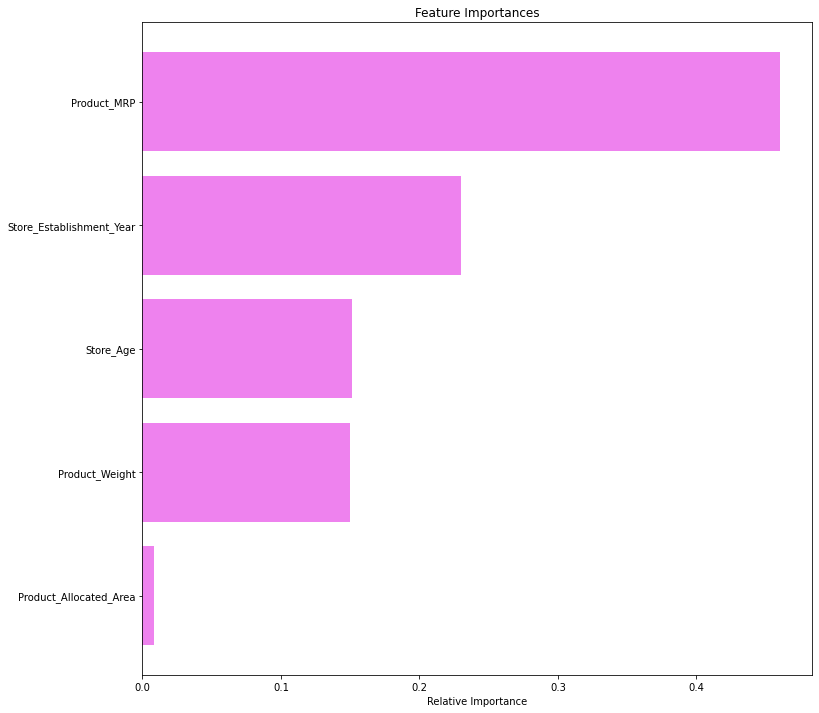

In [104]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Product_MRP is the most important feature


## Model Performance Comparison and Conclusions

### Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting,**

In [105]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
#final_estimator=XGBRegressor(random_state=1)

In [107]:
stacking_estimator=StackingRegressor(estimators=estimators,cv=5)
#stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=10,
                                                     min_impurity_decrease=0.001,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features='sqrt',
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=7,
                                                         max_features=0.7,
                                                         n_estimators=50,
                                                         random_state=1,
                                                         subsample=1))])

In [108]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  134.733915  54.285087   0.983956        0.983943  1.915405


In [109]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
          RMSE         MAE  R-squared  Adj. R-squared    MAPE
0  292.650092  112.920903   0.925159        0.925017  5.0092


### Comparing all models

In [110]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    stacking_estimator_model_train_perf.T],
    axis=1,
)
#models_train_comp_df = pd.concat(
#    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
#    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
#    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
#    axis=1,
#)



models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]
#models_train_comp_df.columns = [
#    "Decision Tree",
#    "Decision Tree Tuned",
#    "Random Forest Estimator",
#    "Random Forest Tuned",
#    "Adaboost Regressor",
#    "Adaboost Tuned",
#    "Gradient Boost Estimator",
#    "Gradient Boost Tuned",
#    "XGB",
#    "XGB Tuned",
#    "Stacking Classifier"
#]



print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,Stacking Classifier
RMSE,0.0,241.461724,105.797225,103.566704,476.999200,473.935351,312.296698,175.833686,134.733915
MAE,0.0,110.047415,40.035684,42.503564,372.805922,370.466190,158.015164,71.838370,54.285087
R-squared,1.0,0.948472,0.990108,0.990520,0.798913,0.801488,0.913805,0.972676,0.983956
Adj. R-squared,1.0,0.948430,0.990100,0.990513,0.798749,0.801326,0.913735,0.972653,0.983943
MAPE,0.0,3.797522,1.412262,1.561745,13.384780,13.309606,5.965826,2.527047,1.915405


In [111]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    stacking_estimator_model_test_perf.T],
    axis=1,
)

#models_test_comp_df = pd.concat(
#    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
#    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
#    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
#    axis=1,
#)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "Stacking Classifier"
]

#models_test_comp_df.columns = [
#    "Decision Tree",
#    "Decision Tree Tuned",
#    "Random Forest Estimator",
#    "Random Forest Tuned",
#    "Adaboost Regressor",
#    "Adaboost Tuned",
#    "Gradient Boost Estimator",
#    "Gradient Boost Tuned",
#    "XGB",
#    "XGB Tuned",
#    "Stacking Classifier"
#]


print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,Stacking Classifier
RMSE,391.769494,317.072681,298.997383,296.328268,498.272479,494.627389,347.393033,296.598528,292.650092
MAE,133.069498,143.885466,112.214025,117.731507,388.073581,385.084740,174.373634,118.716348,112.920903
R-squared,0.865877,0.912147,0.921878,0.923266,0.783043,0.786205,0.894541,0.923126,0.925159
Adj. R-squared,0.865622,0.911979,0.921729,0.923120,0.782629,0.785798,0.894340,0.922980,0.925017
MAPE,5.593766,6.312897,5.005246,5.287624,15.412082,15.327228,7.798668,5.214774,5.009200


- The Random Forest Tuned model is the best model here. It has the highest r2 score of approx 92.3% and the lowest RMSE of approx 29 on the test data.


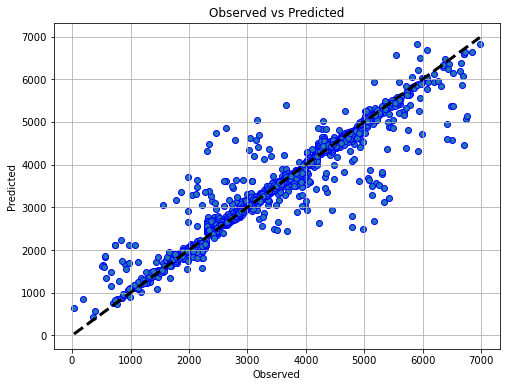

In [112]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

## Actionable Insights and Recommendations

- We can use this predictive model for any parameters (which we know in advance) and can predict the total revenue (Product_Store_Sales_Total). 
- the Random Forest Tuned is the best one and it's faster also
- should focus on the products that make us more revenue and the products which is always in demand 


- Company can provide offers or coupons like a monthly subscription to compensate for the low count.